In [12]:
#initialization 
import matplotlib.pyplot as plt
import numpy as np

#ignore deprecation warnings because they are annoying (not recommened generally)
from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# Section 1: Perform operations on quantum circuits


**qubit** – qubit to measure: Qubit or QuantumRegister or int or slice or Sequence of Qubits or ints

**cbit** – classical bit to place the measurement in:  Clbit or ClassicalRegister or int or Sequence of Qubits or ints

In [9]:
NUM_QUBITS = 2
# let's construct a multi-qubit quantum register
qr = QuantumRegister(NUM_QUBITS, 'q')

qc = QuantumCircuit(qr, name='my-circuit')
# let's create a Bell's state
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [11]:
# let's construct a multi-bit classical register
cr = ClassicalRegister(NUM_QUBITS, 'c')
qc = QuantumCircuit(qr, cr, name='my-circuit')
# explicitly measure qubits [0,1] into classical bits [0,1]
qc.measure(qr, cr)
# alternatively: qc.measure([0,1], [0,1])
qc.draw()

┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
c: 2/═╩══╩═
      0  1

## Single and multi-qubit gates

We are not going to go through basic gates in detail. The reader is expected to be familiar with those. If you are not sure what $X$ or $Z$ gates are you should probably first go through the first two chapters of Qiskit textbook.

In the following we will create circuits for the 4 Bell states. Bell states are 2 qubit states which are known as maximally entangled states. Note though, that these are different from the states of equal superposition of all basis states which you get, for example, by applying a $H$ gate to each qubit in circuit. Secondly note that there are multiple ways in which you can create the Bell state. This is obvious, for example, if you think that you can always replace a sequence of gates $HX$ by $ZH$. For further details refer to Qiskit gate identities.

In [124]:
# Bell state 0
bell_0 = QuantumCircuit(2)
bell_0.h(0)
bell_0.cx(0,1)

sv = Statevector.from_label('00')
#evolve the initial state through the circuit
sv_ev = sv.evolve(bell_0) 
sv_ev.draw('latex')  

<IPython.core.display.Latex object>

In [16]:
# Bell state 1
bell_1 = QuantumCircuit(2)
bell_1.x(0)
bell_1.h(0)
bell_1.cx(0,1)

sv = Statevector.from_label('00')
#evolve the initial state through the circuit
sv_ev = sv.evolve(bell_1) 
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [17]:
# Bell state 2
bell_2 = QuantumCircuit(2)
bell_2.x(0)
bell_2.h(1)
bell_2.cx(1,0)

sv = Statevector.from_label('00')
#evolve the initial state through the circuit
sv_ev = sv.evolve(bell_2) 
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [20]:
# Bell state 3
bell_3 = QuantumCircuit(2)
bell_3.x(0)
bell_3.x(1)
bell_3.h(1)
bell_3.cx(1,0)

sv = Statevector.from_label('00')
#evolve the initial state through the circuit
sv_ev = sv.evolve(bell_3)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [48]:
# state of equal superposition of basis states
max_sp = QuantumCircuit(2)
max_sp.h(0)
max_sp.h(1)

sv = Statevector.from_label('00')
# evolve the initial state through the circuit
sv_ev = sv.evolve(max_sp)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

## Circuit barier

Despite the common use of barier as a visual tool to separate different parts of circuit, **QuantumCircuit.barrier** is actually an instruction for the transpiler. Transpiler uses different optimizations to improve the performance. For exaxmple, it utilizes gate identities to reduce the depth of the circuit. Two Hadamard gates will be composed into an identity gate if they are not separated by a barier. By placing a barier between two gates you enforce the transpiler to only perform optimizations on different sides of the barier. For more info take a look at this [video](https://www.youtube.com/watch?v=tS2CMOyWFMQ) by Qiskit.

**NOTE:** QuantumCircuit.barrier(*args) takes **qargs** as an argument, that is you can specify which qubits you want to apply the barier to. By default barier is applied to all qubits in circuit.

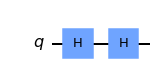

In [26]:
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.draw('mpl')

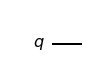

In [32]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
transpile(qc, backend=backend).draw('mpl')

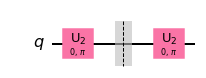

In [31]:
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(1)
qc.h(0)
qc.barrier()
qc.h(0)
transpile(qc, backend=backend).draw('mpl')

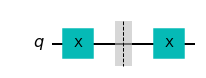

In [36]:
# try it out yourself with different gates: instead of Hadamard, try Pauili gates
my_qc = QuantumCircuit(1)
my_qc.x(0)
my_qc.barrier()
my_qc.x(0)
transpile(my_qc, backend=backend).draw('mpl')
# did you get what you expected?

## Circuit depth

Circuit depth returns the length of critical path in the circuit. It is a metric that calculates the longest path between the input and the output.

**NOTE:** The single argument is **filter_function** – a function to filter out some instructions. Should take as input a tuple of (Instruction, list(Qubit), list(Clbit)). By default filters out “directives”, such as barrier or snapshot.

In [37]:
qc = QuantumCircuit(1)
qc.x(0)
qc.depth()

1

In [39]:
qc = QuantumCircuit(2)
qc.x([0,1])
qc.x(1)
qc.depth()
# draw the circuit yourself to see why the depth has increased now
qc.draw()

2

In [47]:
qc = QuantumCircuit(2)
qc.x(0)
qc.barrier(0)
qc.h(0)
qc.cx(0,1)
qc.depth()
# draw the circuit yourself to see why the depth has increased now
# hint: the longest path is not always the lenth of the longest sequence along one channel
qc.draw()
# the second qubit only has a CX gate applied to it, but has to "wait" for the first qubit to provide the control
# also, barier doesn't count

┌───┐ ░ ┌───┐     
q_0: ┤ X ├─░─┤ H ├──■──
     └───┘ ░ └───┘┌─┴─┐
q_1: ─────────────┤ X ├
                  └───┘

# Section 2: Executing experiments

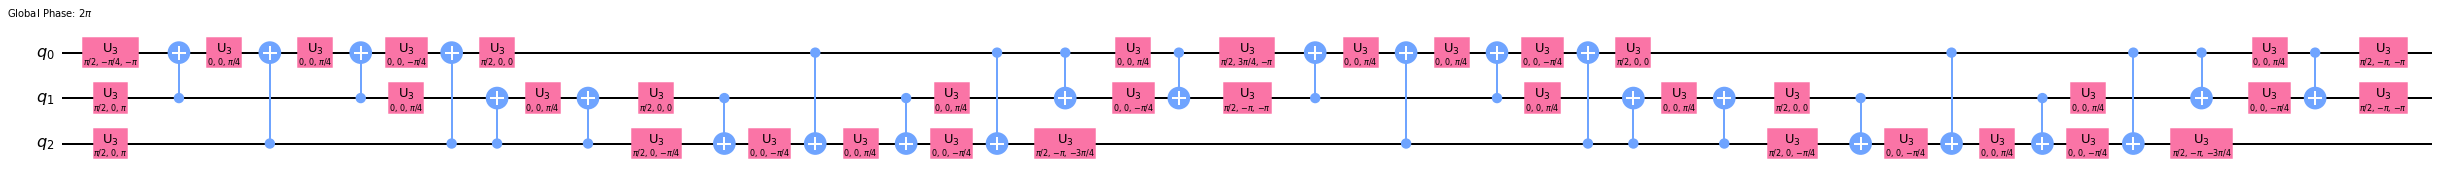

In [113]:
from qiskit.algorithms import Grover, AmplificationProblem

# let's construct an oracle with a single solution
sv = Statevector.from_label('010')
problem = AmplificationProblem(oracle=sv)

grover = Grover(iterations=2).construct_circuit(problem=problem)

# the original circuit contains unitaries
# transpile the circuit to see what it is "made of"
t_grover = transpile(grover, basis_gates=['cx', 'u3'])
t_grover.draw('mpl', fold=-1)

# draw the original cicuit yourself
grover.draw()

In [105]:
# lets's try to evolve the initial state through the circuit like we have done for Bell states
sv = Statevector.from_label('000')
sv_ev = sv.evolve(grover)
sv_ev.draw('latex')
# it is obvious from statevector evolutions, that the state 010
# has the best chances to be measured, as desired

<IPython.core.display.Latex object>

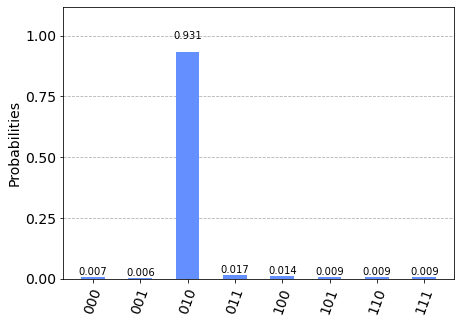

In [106]:
# now let's obtain the same result from the QASM simulation
# for that we need to measure the qubits in the end of our circuit
grover.measure_all()

backend= BasicAer.get_backend('qasm_simulator')
job = execute(grover, backend, shots=1024)
result = job.result()
plot_histogram(result.get_counts())

# Section 4: Implement QASM

QASM is a programming language for circuit based quantum computers. Let's see how we can convert a circuit in Qiskit to QASM strings and back. For more detail refer to this nice [video](https://www.youtube.com/watch?v=wG94YHKDIxc) by Qiskit or to the [documentation](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.qasm.html). 

In [108]:
# let's again use our transpiled Grover circuit to demonstarte the idea

# Notice: QASM doesn't look "nice". This is a low-level language which can be understood by quantum hardware.
# If you want to take a look at the QASM code make sure to specify 'formatted=True' which makes the code readable by a human being.
t_grover.qasm(formatted=True)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
u3(pi/2,-pi/4,-pi) q[0];
u3(pi/2,0,pi) q[1];
cx q[1],q[0];
u3(0,0,pi/4) q[0];
u3(pi/2,0,pi) q[2];
cx q[2],q[0];
u3(0,0,pi/4) q[0];
cx q[1],q[0];
u3(0,0,-pi/4) q[0];
u3(0,0,pi/4) q[1];
cx q[2],q[0];
u3(pi/2,0,0) q[0];
cx q[2],q[1];
u3(0,0,pi/4) q[1];
cx q[2],q[1];
u3(pi/2,0,0) q[1];
u3(pi/2,0,-pi/4) q[2];
cx q[1],q[2];
u3(0,0,-pi/4) q[2];
cx q[0],q[2];
u3(0,0,pi/4) q[2];
cx q[1],q[2];
u3(0,0,pi/4) q[1];
u3(0,0,-pi/4) q[2];
cx q[0],q[2];
cx q[0],q[1];
u3(0,0,pi/4) q[0];
u3(0,0,-pi/4) q[1];
cx q[0],q[1];
u3(pi/2,3*pi/4,-pi) q[0];
u3(pi/2,-pi,-pi) q[1];
cx q[1],q[0];
u3(0,0,pi/4) q[0];
u3(pi/2,-pi,-3*pi/4) q[2];
cx q[2],q[0];
u3(0,0,pi/4) q[0];
cx q[1],q[0];
u3(0,0,-pi/4) q[0];
u3(0,0,pi/4) q[1];
cx q[2],q[0];
u3(pi/2,0,0) q[0];
cx q[2],q[1];
u3(0,0,pi/4) q[1];
cx q[2],q[1];
u3(pi/2,0,0) q[1];
u3(pi/2,0,-pi/4) q[2];
cx q[1],q[2];
u3(0,0,-pi/4) q[2];
cx q[0],q[2];
u3(0,0,pi/4) q[2];
cx q[1],q[2];
u3(0,0,pi/4) q[1];
u3(0,0,-pi/4) q[2];
cx q[0],q

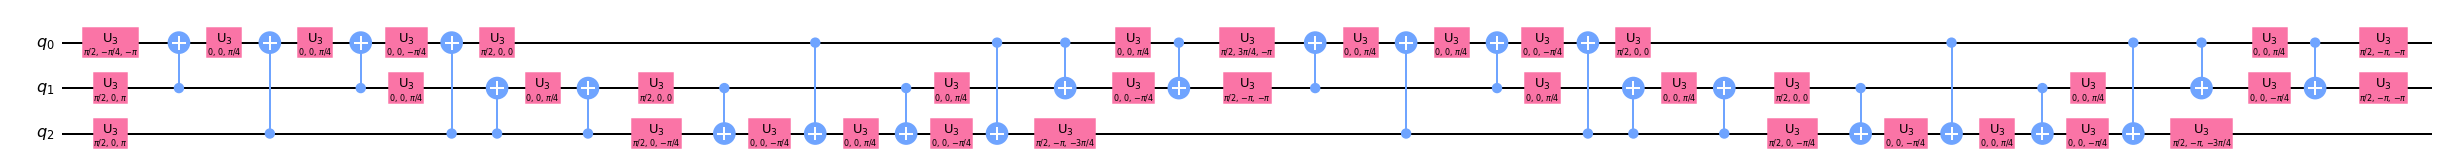

In [112]:
# store the circuit to a file in the follwing way
qasm_code = t_grover.qasm(filename='grover.qasm')

# to get the circuit back from QASM file execute the following
my_qc = QuantumCircuit.from_qasm_file('grover.qasm')
my_qc.draw('mpl', fold=-1)

# Section 9: Construct visualizations

## Draw a circuit

Till this point we have alaways used the **matplotlib** drawer to display our circuits. Let's see how other drawers look like:

In [131]:
# for example, let's draw our Bell's state circuit in text mode
bell_0.draw('text')

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

There are plenty of ways to customize the output. For exmaple, display qubits in reversed order:

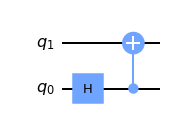

In [133]:
# qubits in reversed order
bell_0.draw('mpl', reverse_bits=True)

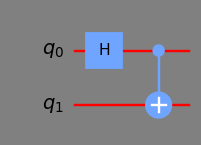

In [149]:
# More customization
style = {'linecolor': 'red', 'backgroundcolor': 'grey'}
bell_0.draw('mpl',scale = 1.2, style=style, fold=-1)

## Density matrix

For a pure state $|\phi\rangle$ the density matrix is constructed din the following way $\rho = |\phi\rangle\langle\phi|$ 

In [127]:
rho = DensityMatrix.from_instruction(bell_0)
rho.draw('latex', prefix='\\rho_{Bell_0} = ')

<IPython.core.display.Latex object>

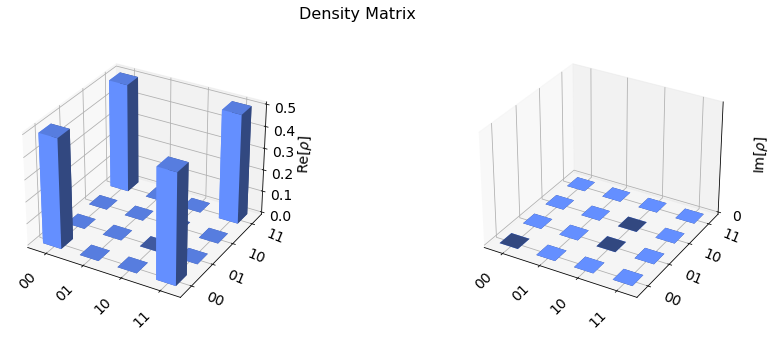

In [128]:
plot_state_city(rho.data, title='Density Matrix')

In [129]:
# prepare a density matrix for the state of the equal superposition of 2 basis states
my_qc = QuantumCircuit(2)
my_qc.h([0,1])
my_rho = DensityMatrix.from_instruction(my_qc)
my_rho.draw('latex', prefix='\\rho_{equal} = ')

<IPython.core.display.Latex object>

In [130]:
# prepare a density matrix for a mixed one-qubit state in an equal mixture of |0> and |1>
my_rho_M = np.array([[0.5, 0], [0, 0.5]])
my_rho = DensityMatrix(my_rho_M)
my_rho.draw('latex', prefix='\\rho_{mixture} = ')

<IPython.core.display.Latex object>